In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [7]:
classifcation_df = pd.read_csv('exported_data/classification_2.csv')

In [8]:
classifcation_df.head()

,Unnamed: 0,dataset,model,embeddings_dir,output_dir,training_batch_size,eval_batch_size,n_epochs,lr,hidden_dim,num_layers,test,device,id,success
0,0,dair-ai/emotion,intfloat/multilingual-e5-small,../classification_embeddings/,../tasks_perfs/output_2,32,512,2,0.001,256,2,False,cuda,7k269phq,0.608344
1,0,dair-ai/emotion,izhx/udever-bloom-560m,../classification_embeddings/,../tasks_perfs/output_2,32,512,2,0.001,256,2,False,cuda,muss2a1a,0.631761
2,0,dair-ai/emotion,sentence-transformers/LaBSE,../classification_embeddings/,../tasks_perfs/output_2,32,512,2,0.001,256,2,False,cuda,eh7gj5q3,0.621372
3,0,rotten_tomatoes,izhx/udever-bloom-560m,../classification_embeddings/,../tasks_perfs/output_2,32,512,2,0.001,256,2,False,cuda,axsze6vn,0.806560
4,0,tweet_eval;emotion,sentence-transformers/average_word_embeddings_...,../classification_embeddings/,../tasks_perfs/output_2,32,512,2,0.001,256,2,False,cuda,19q4oxub,0.591062


<Axes: xlabel='success', ylabel='model'>

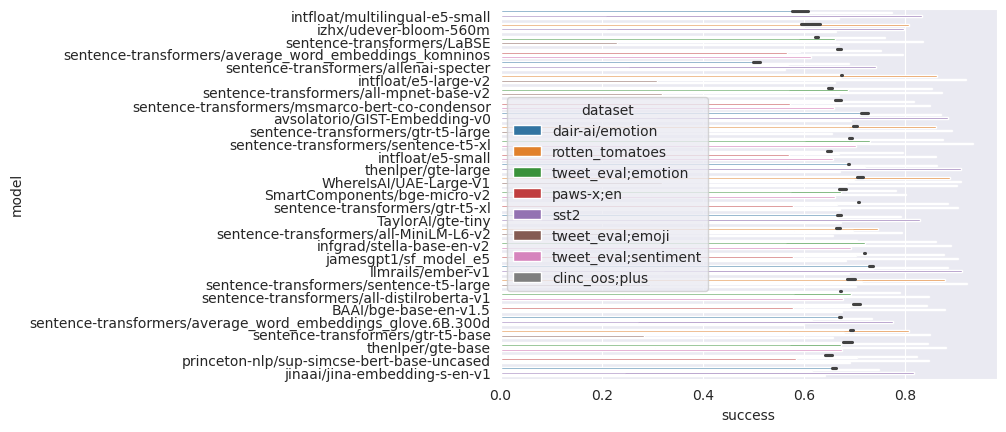

In [13]:
sns.barplot(data=classifcation_df, y='model', x='success', orient='h', hue="dataset")
# rotate x labels

In [25]:
# pivot to make a table model / dataset / success
dedup = classifcation_df.groupby(['dataset', 'model']).first().reset_index()
dedup = dedup[['dataset', 'model', 'success']].dropna()
dedup = dedup[~dedup['dataset'].str.contains('clinc')]
pivot_df = dedup.pivot(index='model', columns='dataset', values='success')

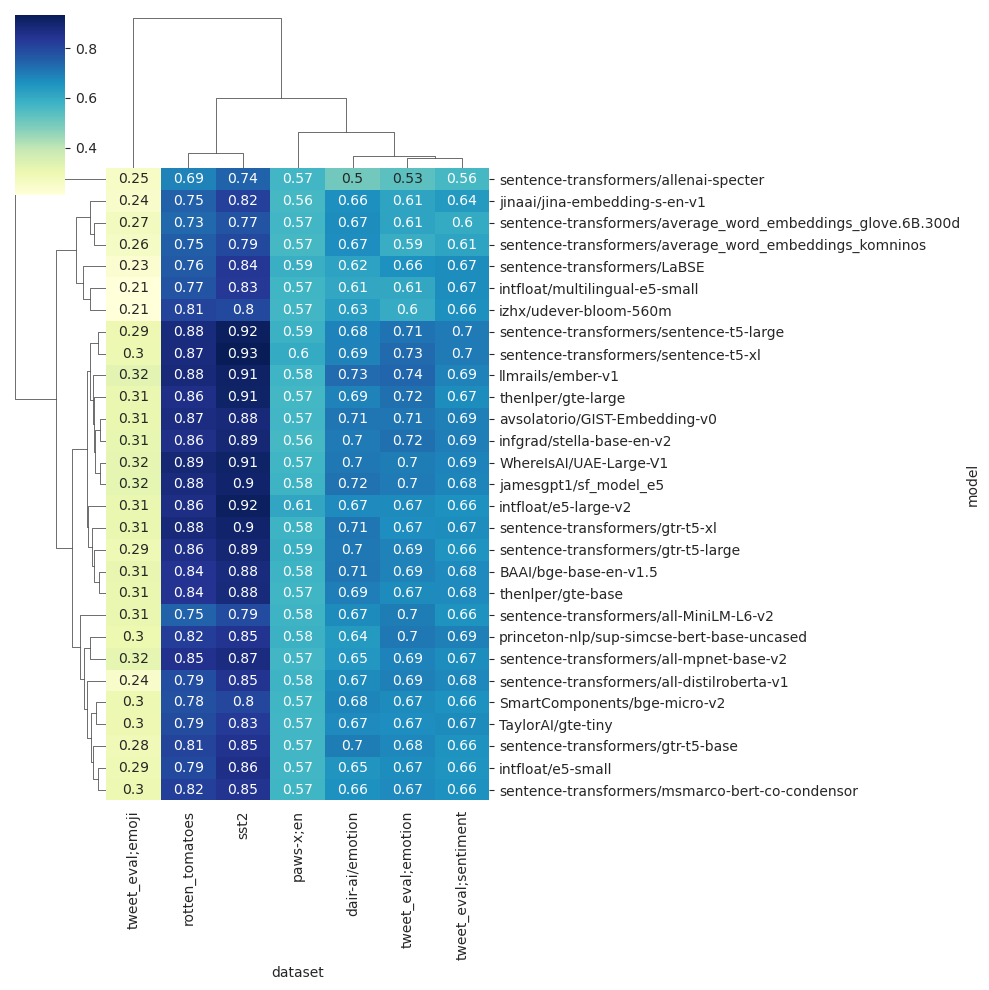

In [27]:
sns.clustermap(pivot_df, annot=True, cmap="YlGnBu")